In [1]:
# 🧪 Test: load_osm_area() and visualize grid cells

import matplotlib.pyplot as plt

# loads a function but from a parent folder
import sys
sys.path.append('..')

In [2]:
from env.map_parser import load_osm_area

In [5]:
# Step 1 — Choose place
place = "Gesundbrunnen, Berlin"
grid_size = 30

# Step 2 — Load parsed/cached grid cells
walkable, obstacles = load_osm_area(place, grid_size=grid_size)


🌍 Downloading OSM data for 'Gesundbrunnen, Berlin'...


/home/antoine/Repos/GeoNavRL/notebooks/../env/map_parser.py:133: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  is_walkable = gdf_edges.distance(point).min() < max(x_step, y_step)


✅ Cached to data/osm_cache/gesundbrunnen_berlin_grid30.json


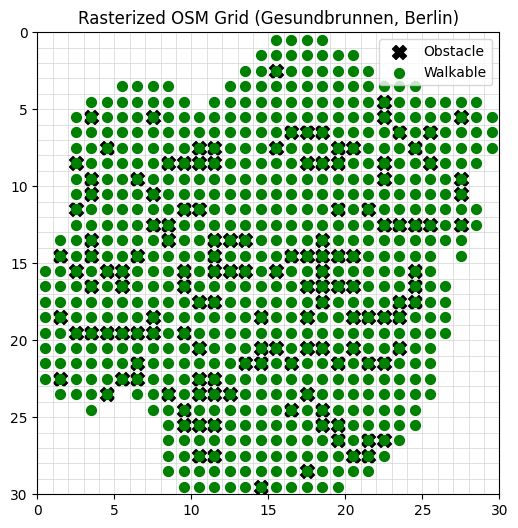

In [6]:

# Convert to grid
def plot_grid(grid_size, walkable, obstacles):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Draw empty grid
    for x in range(grid_size + 1):
        ax.axhline(x, color='lightgray', linewidth=0.5)
        ax.axvline(x, color='lightgray', linewidth=0.5)

    # Plot obstacles
    if obstacles:
        ox, oy = zip(*obstacles)
        ax.scatter([x + 0.5 for x in ox], [y + 0.5 for y in oy], color='black', s=100, marker='X', label="Obstacle")

    # Plot walkables
    if walkable:
        wx, wy = zip(*walkable)
        ax.scatter([x + 0.5 for x in wx], [y + 0.5 for y in wy], color='green', s=50, marker='o', label="Walkable")

    # Layout
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_aspect("equal")
    ax.invert_yaxis()
    ax.legend()
    ax.set_title(f"Rasterized OSM Grid ({place})")
    plt.show()

# Step 3 — Visualize
plot_grid(grid_size, walkable, obstacles)
